# SCRIPT CALIBRATION OCCUPATION DU SOL ET IRRIGATION R-NIAYES 2040

- function 1A : création de dossiers voulus lorsqu'ils n'existent pas

In [2]:
create_folder=function(x,path=getwd()){
    
        for (f in x){
            
            folder<-file.path(path, f)

        if (!dir.exists(folder)){
            dir.create(folder)
            print(paste(f,"has been created!"))
        } else {
        print(paste(folder,"already exists!"))}
        }
}

- function 1B : rechercher les fichiers voulu dans le répertoire initial

In [3]:
find_myfiles=function(files=NULL,ext=NULL,
                      patt=NULL,dir=NULL,
                      fold=NULL){
    initdir<-getwd()
    
    if (is.null(dir)){dir<-getwd()}
    if (!is.null(fold)){dir<-file.path(dir,fold)}
    
    setwd(dir)
    
    #tous les dossiers du repertoire de travail
    all_work_dir<-list.dirs(path = ".",
    full.names = TRUE, recursive = TRUE)

    #list des chemins des fichiers recherchés
    list_path<-c()
    
   #si le nom du fichier est précisé
    if (!is.null(files)){
        for (file in files){
            
            ##si l'extension du fichier est donnée
            
            if(!is.null(ext)){
                file<-tools::file_path_sans_ext(file)
                
                files_path<-reader::find.file(paste(file,
                ext,sep=""),dir=dir,dirs=all_work_dir)
                
                #si un pattern est donné
                
                if (!is.null(patt)){
                    
                    files_path<-
                    Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),
                           list.files(files_path,
                                      pattern = patt,
                                      full.names=T))}
                
                list_path<-c(list_path,files_path)
            }
            
            ##si l'extension n'est pas donnée 
            #et que l'extension n'est pas dans le nom
            
            if(is.null(ext) & (tools::file_ext(file)=="")){
                
                print("Ajoutez l'extension au nom du fichier!!")
                print("Si le problème, 
                persiste alors le fichier n'existe probablement 
                pas dans ce répertoire!!")}
            
            ##si l'extension n'est pas donnée 
            #et que l'extension est dans le nom
            
            if(is.null(ext) & (tools::file_ext(file)!="")){
                
                ext<-tools::file_ext(file)
                files_path<-reader::find.file(file,
                            dir=dir,dirs=all_work_dir)
                
                #si un pattern est donné
                
                if (!is.null(patt)){
                    
                    files_path<-list.files(files_path,
                                           pattern = patt)}
            }
        }
        list_path<-c(list_path,files_path)
    }
        
           #si le nom du fichier n'est pas précisé
    
    if(is.null(files)){
        print("pas de nom fichier")
        
        ##si l'extension du fichier n'est pas donnée
        
        if(is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt,full.names=T)
                list_path<-c(list_path,p)}
        }
        
        if(is.null(ext) & (is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di)
                list_path<-c(list_path,p,full.names=T)}
        }
        
        ##si l'extension du fichier est donnée
        
        if(!is.null(ext) & (!is.null(patt))){
            
            for (di in all_work_dir){
                p<-list.files(di,pattern = patt,full.names=T)
                p<-Filter(function(x) grepl(paste(ext,
                                    "$",sep=""), x),p)
                          list_path<-c(list_path,p)}
                          }
                          
            if(is.null(ext) & (is.null(patt))){
                
                for (di in all_work_dir){
                    p<-list.files(di,full.names=T)
                    p<-Filter(function(x) grepl(paste(ext,
                                        "$",sep=""),x),p)
                    list_path<-c(list_path,p)}
                              }
                    list_path}
                    setwd(initdir)
    return(list_path)}

- function 1C : renommer un fichier existant

In [4]:
rename_rfile <- function (file=file,updat=file,
                          cdir=NULL,dir=NULL){
    
    if(!is.null(dir)){file<-file.path(dir,file)
                      updat<-file.path(dir,updat)}
    
    if (file.exists(file)) {
        file.rename(file,updat)

    } else {
        cat("The file does not exist")
    }
}

- function 1D : split bar

In [5]:
split_bar<-function(x){
    as.list(strsplit(tools::file_path_sans_ext(x),
                     '/')[[1]])[-1]
}

In [6]:
split_bar8<-function(x){
    as.list(strsplit(tools::file_path_sans_ext(x),
                     '_')[[1]])[-1]
}

- function 1E : copier ou déplacer des données dans les bons dossiers à partir des sorties brutes

In [7]:
tranf_raster=function(full.pth,new_f="data/rasters",
                      methode="copy"){
    
    d<-split_bar(full.pth)
    current_f<-file.path("data","simulations",
                         d[[1]],d[[2]])
    
    file<-paste(d[[3]],".tif",sep="")
    
     if (methode=="copy"){ 
         file.copy(file.path(current_f,file),new_f)
         
     }
    
    if (methode=="move"){
         filesstrings::file.move(file.path(current_f,file),new_f)
     }
    
    updat<-gsub("simulation",
                paste("simulation_",d[[3]],
                "_",sep=""),d[[1]])
    updat<-paste(updat,".tif",sep="")

     
     rename_rfile(dir=new_f,file=file,updat=updat)
 }

- function 1F : Récuperer les données Rasters Simulée pour les copier dans le dossier prévu pour

In [8]:
get_My_raster<-function(raster="2014",dir="data",fold="simulations"){
    
    raster_dir<-find_myfiles(patt=raster,ext=".tif",
                             fold=fold,dir=dir)
    

    for (ri in raster_dir){
        tranf_raster(ri)}
}

- function 1F: créer les graphique observations contre simulations

In [9]:
graph_station_simul=function(obs,s,o="irrigation"){
    
    obs<-obs
    simul<-s
    
    
    outpath<-
    
    
    i<-0
    plot_list<-c()
    
    library(ggplot2)
    
    plot <-ggplot(X, aes(x=date)) + 
    ylim(0, 7)+ geom_line(aes(y=piezo, color="green")) + 
    geom_line(aes(y=piezostation,color="red")) +
    scale_colour_discrete(name="Piezo (m)",
                          labels= c("ocelet" ,"station")) +
    ggtitle(label = paste("zone ",z),
            subtitle = "Piezo Calculee / Simulee")
    plot_list[[z]] = plot
    
    jpeg(file.path(outpath,paste("plot",z,".tiff", sep="")))
    print(plot)
    dev.off()
}

- function 1G : lire un fichier csv en détectant automatiquement le séparateur

In [10]:
rcsv_sep=function(file_path){
    L <- readLines(file_path, n = 1)
    if (grepl(";", L)) read.csv2(file_path) else read.csv(file_path)
    }

- function : calculer le Nash-Sutcliffe efficiency

In [11]:
rmse=function(x,y){
    sqrt( sum((x-y)^2,na.rm=TRUE )/length(y))
}

denom_nash=function(x){
    m<-mean(x,na.rm=TRUE )
    sqrt( sum((x-m)^2,na.rm=TRUE )/length(x))
}

In [12]:
nash_sutcliffe=function(x,y){   
    a<-rmse(x,y)
    dn<-denom_nash(x)
    res<-1-(a/dn)
    return(res)
}

- optimisation du model

In [36]:
indicateur=function(bande=1,dir=getwd(),
                    list_parametre=NULL,
                    opt=NULL){
    
    if (is.null(opt)){
        opt<-"0.0_6.0_3.0_0.4_0.0_0.0_true_12.0_70.0"

    }
    
    if (bande==1){patt="irrig"}
    if (bande==2){patt="urbain"}
    
    parametre<-c("expCoeff","penteInfCoeff","distrouteCoeff",
                 "ratioliste","voisUrbCoef","routesCoef",
                 "route_vois","popHaIrrig","popHaUrb")

         if (is.null(list_parametre)){
             list_parametre=parametre}
    
    print("préparation des données:
    cette opération peut prendre un peu de temps...")
    

    #extraction des observations
    initM<-list.files("data/observations",full.names=T)
    bande_observ<-raster(initM,band=bande)

    
    #extraction des bandes des rasters
    list.simul<-Filter(function(x) grepl(".tif$", x),
    list.files("data/rasters",pattern = patt))
    
    indicateurs<-vector(mode="list",length=length(list.simul))
    a<-0
    
    for (simul in list.simul){
        print(simul)
        a<-a+1
        #extraction des bandes des rasters
        bande_simul<-raster(file.path("data/rasters",simul))
        observation<-round(data.frame(rasterToPoints(bande_observ)),1)


        simulation<-round(data.frame(rasterToPoints(bande_simul)),1)
        table<-na.omit(dplyr::left_join(observation,simulation,
                                    by=c("x"="x","y"="y")))

        names(table)<-c("coord1","coord2","observation","simulation")


        #Les indicateurs
        indicateur<-data.frame(matrix(0,nrow=1,
                    ncol=length(parametre)))

        names(indicateur)<-parametre

        index1<-Metrics::rmse(table$observation,table$simulation)
        index2<-Metrics::rmsle(table$observation,table$simulation)
        index3<-nash_sutcliffe(table$observation,table$simulation)
        
        splits<-split_bar8(simul)
        
        if(length(splits)<=1){
            splits<-split_bar8(opt)}
        
        for (i in 2:length(splits)){
            indicateur[1,i-1]<-splits[[i]]
        }

        
        indicateur$rmse<-(index1)
        indicateur$rmsle<-(index2)
        indicateur$nash_sutcliffe<-(index3)
    
        indicateurs[[a]]<-indicateur
    }
    indicateurs<-dplyr::bind_rows(indicateurs)
    return(indicateurs)
    
}

normalisation sur 0-1

In [14]:
normaliz_zero<-function(x){
    x<-na.omit(x)
    min<-min(x)
    max<-max(x)
    
    val<-as.numeric(lapply(x,function(y) (y-min)/(max-min)))
                           
return(val)
}

#### extraire les rasters simulés

#### importation des rasters et calcul des indicateurs

In [17]:
library(raster)

In [37]:
rmse_urbain<-indicateur(bande=1)
rmse_irrigation<-indicateur(bande=2)

[1] "préparation des données:\n    cette opération peut prendre un peu de temps..."
[1] "irrig2018.tif"
[1] "préparation des données:\n    cette opération peut prendre un peu de temps..."
[1] "urbain2018.tif"


In [38]:
write.csv2(rmse_irrigation,file.path("output","rmse_irrigation2018.csv"))
write.csv2(rmse_urbain,file.path("output","rmse_urbain2018.csv"))

#### meilleurs simulations model espace irrigué & urbain selon les indicateurs

In [39]:
rmse_ir<-rcsv_sep('output/rmse_irrigation2018.csv')[-1]
rmse_ur<-rcsv_sep('output/rmse_urbain2018.csv')[-1]

In [40]:
rmse_model<-rmse_ir[1:9]
rmse_model$rmsle<-rmse_ir$rmsle+rmse_ur$rmsle
rmse_model$rmse<-rmse_ir$rmse+rmse_ur$rmse
rmse_model$nash_sutcliffe<-rmse_ir$nash_sutcliffe+rmse_ur$nash_sutcliffe

In [41]:
write.csv2(rmse_model,file.path("output","rmse_model_urbain&irrigation2018.csv"))

#### analyse de sensibilité model espace irrigué & urbain

- les paramètres d'entrée

In [15]:
X<-rmse_model

In [16]:
X$route_vois<-ifelse(X$route_vois=='false',0,1)

In [17]:
rmse_norm<-data.frame(sapply(X,as.numeric))

rmse_norm[c(1:6,8:9)]<-round(data.frame(sapply(rmse_norm[c(1:6,
                                        8:9)],normaliz_zero)),2)

- Plan One At Time (OAT)

In [18]:
pPlan<-sapply(data.frame(sapply(X,
                 as.numeric))[1:9],unique)

pPlan<- data.frame(lapply(pPlan, function(x) {
  x <- unlist(x)
  length(x) <- max(lengths(pPlan))
  return(x)
}))
pPlan
pPlan<-pPlan

expCoeff,penteInfCoeff,distrouteCoeff,ratioliste,voisUrbCoef,routesCoef,route_vois,popHaIrrig,popHaUrb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,0,0.2,0,0,0,12,60
3,6,3,0.4,3,3,1,15,65
6,9,6,0.6,6,6,NA,9,70
9,0,9,NA,9,9,NA,NA,NA


In [19]:
poat<-rmse_norm

- méthode de Morris: Le plan de morris avec échantillonnage radial itéré

In [77]:
set.seed(42)
i<-0
EE<-c()
PARAM<-c()
choc<-c()
response<-c()

while (i<10){
    i<- i+1
    t<-c()
    T<-0

    
        #premier plan OAT

            ##trier au hasard l'état initial des paramètre du plan OAT
    L0<-sample(dim(poat)[1],1)
    input0 <- poat[L0,1:9]

            ##appel initial au model (réponse du model au set initial de paramètres)
    output0 <- poat[L0,11]
    
            while (T<45){
            #effets elementaire
                ##tirage aléatoire pour modification d'une entrée
            to<-sample(length(input0),1)

                ##modification du parametre choqué:
            input1 <- input0

            c<-0

            lt<-(na.omit(unique(poat[[to]])))
            lt<-lt[lt!=input0[[to]]]
                
            while (c<1){
                chg<-sample(lt,1)[[1]]
                input1[to]<-chg

                y<-subset(poat,
                expCoeff==input1[["expCoeff"]] &
                penteInfCoeff==input1[["penteInfCoeff"]] &
                distrouteCoeff==input1[["distrouteCoeff"]] &
                ratioliste==input1[["ratioliste"]]  &
                voisUrbCoef==input1[["voisUrbCoef"]] &
                routesCoef==input1[["routesCoef"]] &
                route_vois==input1[["route_vois"]] &
                popHaIrrig==input1[["popHaIrrig"]] &
                popHaUrb==input1[["popHaUrb"]])
        

                    ##le pas de changement
                d<-unlist(chg-input0[to])
                
                if (NROW(y)>0){
                    c<-1}
                if (NROW(y)==0){
                    input1 <- input0
                    lt<-lt[lt!=chg]}}
            
                ##appel au model choqué
            output1 <- y[11]
            input1 <- y[L0,1:9]

                ## effet élémentaire EE
            EE1<-(output1-output0)/d
            EE <-c (EE,round(EE1,3))
            PARAM<- c(PARAM,names(input1)[to])
            choc<-c(choc,d)
            response<-c(response,round((output1-output0),3))
            t<-c(t,to)
            T<-sum(unique(t))
    }

}

In [78]:
ee_morris <- data.frame(cbind(unlist(PARAM),
                              unlist(EE),
                              unlist(choc),
                              unlist(response)))
rownames(ee_morris) <-NULL 
ee_morris[2:4]<-sapply(ee_morris[2:4],as.numeric)
ee_morris[1]<-sapply(unlist(ee_morris[1]),as.factor)
names(ee_morris) <- c("parametres","effet_elementaire","delta_X","delta_Y")

In [79]:
morris<-pPlan[which(pPlan[1]=="R"),]

In [80]:
for (j in 1:9){
    morris["mean_effect",j]<-round(mean((ee_morris[which(ee_morris[1]==names(morris)[j]),2]),
                                                 na.rm=TRUE),3)
    
    morris["mean_absolute_effect",j]<-round(mean(abs(ee_morris[which(ee_morris[1]==names(morris)[j]),2]),
                                                 na.rm=TRUE),3)
    
    morris["sd_effect",j]<-round(sd(ee_morris[which(ee_morris[1]==names(morris)[j]),2],
                                    na.rm=TRUE),3)
    
        morris["delta_X",j]<-round(mean(ee_morris[which(ee_morris[1]==names(morris)[j]),3],
                                    na.rm=TRUE),3)
    
        morris["delta_Y",j]<-round(mean(ee_morris[which(ee_morris[1]==names(morris)[j]),4],
                                    na.rm=TRUE),3)
}
morris<-t(morris)

In [81]:
plt<-data.frame(morris)

- Plot morris Plan

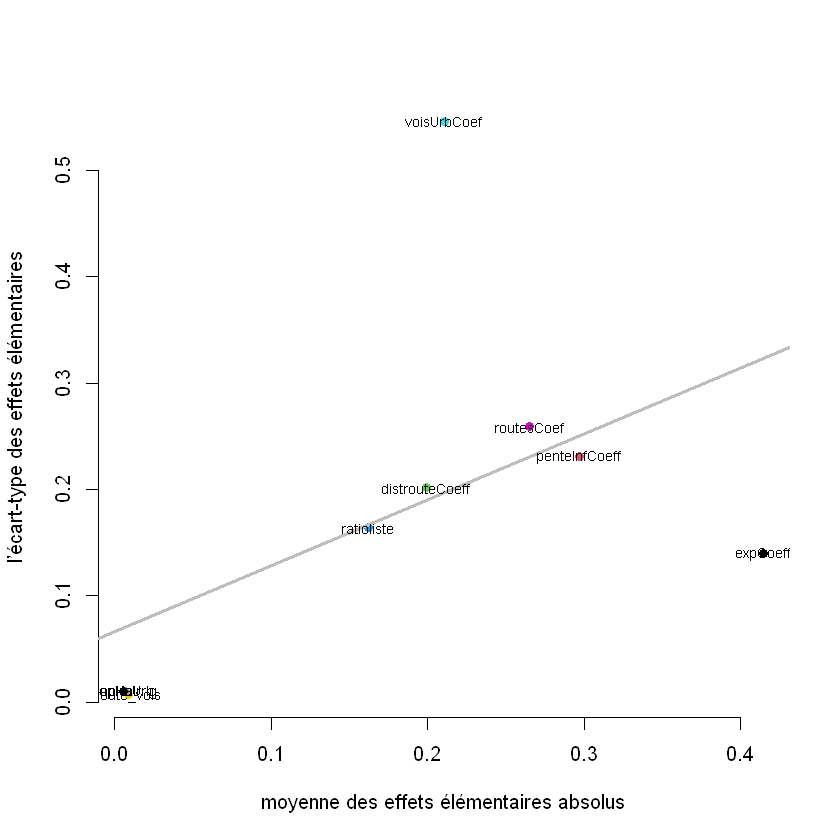

In [82]:
plot(x = plt$mean_absolute_effect,
     y = plt$sd_effect,
     pch = 16, frame = FALSE,
     xlab = "moyenne des effets élémentaires absolus", 
     ylab = "l’écart-type des effets élémentaires",
     col = c(1:9))
abline(lm(sd_effect ~ mean_absolute_effect,data=plt), col="grey", lwd=3)
#text(sd_effect ~ mean_effect, labels=rownames(plt),data=plt, cex=0.9, font=2)
text(plt$mean_absolute_effect,plt$sd_effect,labels=rownames(plt), cex= 0.7, offset = 10)

In [83]:
write.csv2(ee_morris, file = "effet_elementaire_morris.csv")

- Rang Morris

In [84]:
rank<-data.frame(morris[,2:3])
rank$sum<-(rank$sd_effect+rank$mean_absolute_effect)
rank<-rank[order(rank$sum),]
rank$Rang_Morris<-sort(1:9,decreasing=TRUE)
rank<-rank[order(rank$Rang_Morris),-3]

In [85]:
rank

,mean_absolute_effect,sd_effect,Rang_Morris
,<dbl>,<dbl>,<int>
voisUrbCoef,0.211,0.546,1
expCoeff,0.415,0.140,2
penteInfCoeff,0.297,0.231,3
routesCoef,0.265,0.259,4
distrouteCoeff,0.199,0.202,5
ratioliste,0.162,0.164,6
popHaIrrig,0.007,0.010,7
popHaUrb,0.006,0.010,8
route_vois,0.009,0.007,9
